In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [2]:
car_avg_df = pd.read_pickle('car_avg_stats_df.pkl')

In [3]:
def calc_passer_rating(row):
    comp_p = (row['Cmp'] / row['Att'] - .3) * 5
    pyd_p = (row['Pass_Yds'] / row['Att'] - 3) * .25
    td_p = (row['TD'] / row['Att']) * 20
    int_p = 2.375 - (row['Int'] / row['Att']) * 25
    return sum([comp_p, pyd_p, td_p, int_p]) / 6

car_avg_df['YTD_Rating'] = car_avg_df.apply(calc_passer_rating, axis=1)

In [4]:
car_avg_df['TD%'] = car_avg_df.apply(lambda x: x['TD'] / x['Att'], axis=1)

In [5]:
car_avg_df['Int%'] = car_avg_df.apply(lambda x: x['Int'] / x['Att'], axis=1)

In [6]:
car_avg_df.describe(include='all')

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,...,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp,YTD_Rating,TD%,Int%
count,375,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
unique,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brett Favre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.178667,72.528000,72.106667,43.866667,116.992000,1484.901333,2401.632000,17505.304000,66.480000,...,32.085255,1.479979,230.191522,0.904011,2.023924,0.581489,5.338667,0.860665,0.045811,0.028374
std,NaN,8.936949,58.533949,58.425366,38.911092,110.767075,1308.213489,2055.692636,15335.308288,57.639985,...,3.652951,0.386478,32.496898,0.209724,0.560860,0.132530,4.137991,0.090869,0.009604,0.006813
min,NaN,1984.000000,13.000000,13.000000,1.000000,8.000000,129.000000,233.000000,1619.000000,4.000000,...,15.533333,0.533333,107.933333,0.250000,0.800000,0.062500,1.000000,0.590090,0.020619,0.008715
25%,NaN,1999.500000,30.000000,29.500000,14.000000,33.500000,502.000000,869.000000,6029.000000,24.000000,...,30.033333,1.210591,211.839583,0.766799,1.663194,0.500000,2.000000,0.800613,0.039183,0.023970
50%,NaN,2009.000000,48.000000,48.000000,32.000000,78.000000,1021.000000,1673.000000,12215.000000,46.000000,...,32.672897,1.507937,232.172414,0.900000,1.982857,0.606557,4.000000,0.865494,0.046533,0.027972
75%,NaN,2013.500000,103.000000,101.000000,62.000000,159.500000,2067.500000,3368.500000,24971.000000,93.500000,...,34.320261,1.733333,251.805387,1.063687,2.384652,0.666667,8.000000,0.931595,0.052632,0.032551


In [7]:
career_ratings = car_avg_df.groupby('name', as_index=False).agg({'YTD_Rating':'mean'})
career_ratings

,name,YTD_Rating
0,Aaron Rodgers,1.024250
1,Alex Smith,0.846320
2,Andrew Luck,0.833639
3,Andy Dalton,0.859108
4,Baker Mayfield,0.936900
...,...,...
74,Tony Romo,0.961200
75,Troy Aikman,0.818554
76,Tyrod Taylor,0.967930
77,Vince Young,0.667309


In [8]:
career_ratings.describe()

,YTD_Rating
count,79.000000
mean,0.848839
std,0.098764
min,0.664739
25%,0.777234
50%,0.846342
75%,0.915291
max,1.138434


(array([ 7.,  8., 12., 16., 12., 11.,  7.,  5.,  0.,  1.]),
 array([0.66473853, 0.71210806, 0.7594776 , 0.80684714, 0.85421668,
        0.90158622, 0.94895575, 0.99632529, 1.04369483, 1.09106437,
        1.13843391]),
 <a list of 10 Patch objects>)

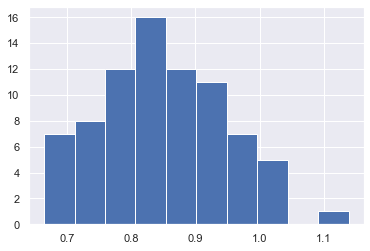

In [9]:
plt.hist(career_ratings['YTD_Rating'])

## Used qcut to classify QBs into 3 different tiers

In [10]:
career_ratings['tier'] = pd.qcut(career_ratings['YTD_Rating'], 3, labels = [3,2,1])

In [11]:
career_ratings['tier'] = career_ratings['tier'].astype(int)

In [12]:
data_stats = career_ratings.merge(car_avg_df, on='name')

In [13]:
data_stats.rename({'YTD_Rating_y':'YTD_Rating'}, axis=1, inplace=True)

In [14]:
car_avg_stats = ['Year','FY_TD','G','Career W %','Cmp/gm',
                 'Att/gm','TD/gm','TD%','Int%','Pass_Yds/gm','Int/gm',
                 'Sk/gm', 'Yrs Xp', 'tier']

In [15]:
car_avg_graph_df = data_stats[car_avg_stats]
car_avg_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         375 non-null    int64  
 1   FY_TD        375 non-null    float64
 2   G            375 non-null    int64  
 3   Career W %   375 non-null    float64
 4   Cmp/gm       375 non-null    float64
 5   Att/gm       375 non-null    float64
 6   TD/gm        375 non-null    float64
 7   TD%          375 non-null    float64
 8   Int%         375 non-null    float64
 9   Pass_Yds/gm  375 non-null    float64
 10  Int/gm       375 non-null    float64
 11  Sk/gm        375 non-null    float64
 12  Yrs Xp       375 non-null    int64  
 13  tier         375 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 43.9 KB


## QB tier analysis

In [ ]:
tier1_graph_df = car_avg_graph_df[car_avg_graph_df['tier'] == 1]
tier2_graph_df =car_avg_graph_df[car_avg_graph_df['tier'] == 2]
tier3_graph_df =car_avg_graph_df[car_avg_graph_df['tier'] == 3]

In [ ]:
tier1_graph_df.describe(include='all')

In [ ]:
tier2_graph_df.describe(include='all')

In [ ]:
tier3_graph_df.describe(include='all')

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = sns.heatmap(tier1_graph_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

In [ ]:
fig = plt.figure(figsize=(14,10))
ax2 = sns.heatmap(tier2_graph_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

In [ ]:
fig = plt.figure(figsize=(14,10))
ax3 = sns.heatmap(tier3_graph_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

In [ ]:
sns.pairplot(car_avg_graph_df, height=1.2, aspect=1.5)

## Test Set thinking
2018 is the test set to compare to 2019 actual performance.


In [16]:
car_avg_graph_df.head()

,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,TD%,Int%,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,tier
0,2008,30.0,16,0.375000,21.312500,33.500000,1.750000,0.052239,0.024254,252.375000,0.812500,2.125000,1,1
1,2009,28.0,32,0.531250,21.593750,33.656250,1.812500,0.053853,0.018570,264.750000,0.625000,2.625000,2,1
2,2010,45.0,47,0.574468,21.340426,33.021277,1.829787,0.055412,0.019974,263.702128,0.659574,2.446809,3,1
3,2011,39.0,62,0.661290,21.709677,33.129032,2.112903,0.063778,0.018014,274.790323,0.596774,2.435484,4,1
4,2012,38.0,78,0.666667,22.012821,33.410256,2.179487,0.065234,0.017268,273.487179,0.576923,2.589744,5,1


In [17]:
test_df_2018 = car_avg_graph_df[car_avg_graph_df['Year'] == 2018]
train_val_df = car_avg_graph_df[car_avg_graph_df['Year'] < 2018].copy()

# Preliminary feature engineering

In [18]:
train_val_df.head()

,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,TD%,Int%,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,tier
0,2008,30.0,16,0.375000,21.312500,33.500000,1.750000,0.052239,0.024254,252.375000,0.812500,2.125000,1,1
1,2009,28.0,32,0.531250,21.593750,33.656250,1.812500,0.053853,0.018570,264.750000,0.625000,2.625000,2,1
2,2010,45.0,47,0.574468,21.340426,33.021277,1.829787,0.055412,0.019974,263.702128,0.659574,2.446809,3,1
3,2011,39.0,62,0.661290,21.709677,33.129032,2.112903,0.063778,0.018014,274.790323,0.596774,2.435484,4,1
4,2012,38.0,78,0.666667,22.012821,33.410256,2.179487,0.065234,0.017268,273.487179,0.576923,2.589744,5,1


In [19]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [20]:
add_deviation_feature(train_val_df, 'TD/gm', 'tier')

# Working with non-test set

## Create model in sm and perform LR Assumption / residual checks

In [21]:
# log-transformed FY TD
X = train_val_df.drop(['FY_TD'], axis=1)
y = np.log(train_val_df['FY_TD'])

### Note to self, all y has been transformed at this point (including for test set)

In [22]:
assumption_test_df = train_val_df.copy()

In [23]:
def stats_model_for_residuals(df, X, y):
    x_for_sm = sm.add_constant(X)
    sm_linear_all = sm.OLS(y, X).fit()
    
    df['predict']=sm_linear_all.predict(X)
    df['resid']= y-df['predict']
    with sns.axes_style('white'):
        plot = df.plot(
            kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))
    return df
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


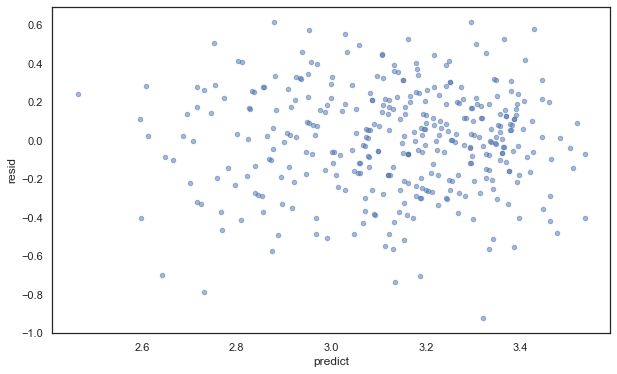

In [24]:
df_with_residuals = stats_model_for_residuals(train_val_df, X, y)

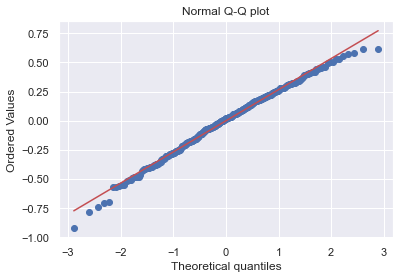

In [25]:
import scipy.stats as stats
stats.probplot(df_with_residuals['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Residuals appear to be slightly left skewed with minor fluctuations in the error variance.

# Linear Regression Modeling

# Cross Validation

In [26]:
def MSE_calc(y_val, val_pred):
    return sum((np.exp(y_val) - np.exp(val_pred))**2)/len(y_val)

In [27]:
def split_and_CV(X, y):
    X, y = np.array(X), np.array(y)
    kf = KFold(n_splits=4, shuffle=True)
    cv_lm_r2 = []
    cv_ridge_r2 = []
    cv_lm_MSE = []
    
    for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]
        
        # Linear model
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        cv_lm_r2.append(lr_model.score(X_val, y_val))
        val_pred = lr_model.predict(X_val)
        MSE_man = MSE_calc(y_val, val_pred)
        cv_lm_MSE.append(MSE_man)

        # Ridge model
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        lm_ridge = Ridge(alpha=.1)
        lm_ridge.fit(X_train_scaled, y_train)
        cv_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    print(f'R^2 LM reg: {cv_lm_r2}')
    print(f'LM reg mean cv R^2: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
    print(f'MSE: {cv_lm_MSE}')
    print(f'MSE simple mean: {np.mean(cv_lm_MSE)}\n')

    print(f'R^2 Ridge: {cv_ridge_r2}')
    print(f'LM ridge mean cv R^2: {np.mean(cv_ridge_r2):.3f} +- {np.std(cv_ridge_r2):.3f}\n')

# Feature Engineering

In [28]:
# polynomial regression

def poly_add(X,y,alpha=1):
    cv_poly_r2 = []
    cv_poly_MSE = []
    cv_ridge_r2 = []
    cv_ridge_MSE = []
    cv_LASSO_r2 = []
    cv_LASSO_MSE = []
    
    # Polynomial factors
    
    X['PY/G^2'] = X['Pass_Yds/gm'] ** 3 + X['Pass_Yds/gm'] ** 2
    X['Cmp/G^2'] = X['Cmp/gm'] ** 3 + X['Cmp/gm'] ** 2
    X['TD/gm^2'] = X['TD/gm'] ** 3 + X['TD/gm'] ** 2
    
    # Add interaction terms
    X['TD%_/_Int%'] = X['TD%'] / X['Int%']
    
    
    X, y = np.array(X), np.array(y)   
    
    kf = KFold(n_splits=4, shuffle=True)

    for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]
        
        # Feature engineered model
        poly_model = LinearRegression()
        poly_model.fit(X_train, y_train)
        cv_poly_r2.append(poly_model.score(X_val, y_val))
        val_pred = poly_model.predict(X_val)
        MSE_man = MSE_calc(y_val, val_pred)
        cv_poly_MSE.append(MSE_man)
        
        #### Regularization Section ####
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        # Ridge
#         lm_ridge = Ridge(alpha=alpha)
#         lm_ridge.fit(X_train_scaled, y_train)
#         cv_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
#         val_pred = lm_ridge.predict(X_val_scaled)
#         MSE_man = MSE_calc(y_val, val_pred)
#         cv_ridge_MSE.append(MSE_man)
        
        # LASSO
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train_scaled, y_train)
        cv_LASSO_r2.append(lasso_model.score(X_val_scaled, y_val))
        val_pred = lasso_model.predict(X_val_scaled)
        MSE_man = MSE_calc(y_val, val_pred)
        cv_LASSO_MSE.append(MSE_man)
        
    print(f'R^2 Poly: {cv_poly_r2}')
    print(f'Poly mean cv R^2: {np.mean(cv_poly_r2):.3f} +- {np.std(cv_poly_r2):.3f}')
    print(f'Poly MSE: {cv_poly_MSE}')
    print(f'Poly MSE: {np.mean(cv_poly_MSE):.3f} +- {np.std(cv_poly_MSE):.3f}\n')
 
#     print(f'R^2 Ridge: {cv_ridge_r2}')
#     print(f'Poly ridge mean cv R^2: {np.mean(cv_ridge_r2):.3f} +- {np.std(cv_ridge_r2):.3f}')
#     print(f'Poly ridge MSE: {cv_ridge_MSE}')
#     print(f'Poly MSE: {np.mean(cv_ridge_MSE):.3f} +- {np.std(cv_ridge_MSE):.3f}\n')

    print(f'R^2 LASSO: {cv_LASSO_r2}')
    print(f'Poly LASSO mean cv R^2: {np.mean(cv_LASSO_r2):.3f} +- {np.std(cv_LASSO_r2):.3f}')
    print(f'Poly LASSO MSE: {cv_LASSO_MSE}')
    print(f'Poly MSE: {np.mean(cv_LASSO_MSE):.3f} +- {np.std(cv_LASSO_MSE):.3f}') 

In [30]:
poly_add(X,y,.001)

R^2 Poly: [0.26718026961674524, 0.3803629064293147, 0.3410377676960935, 0.2862500991949227]
Poly mean cv R^2: 0.319 +- 0.045
Poly MSE: [42.22164344071102, 45.469885221376295, 38.94027809695966, 46.497655779900725]
Poly MSE: 43.282 +- 2.962

R^2 LASSO: [0.3422310907237266, 0.3610378534697719, 0.3437491775600783, 0.30255781689638717]
Poly LASSO mean cv R^2: 0.337 +- 0.021
Poly LASSO MSE: [39.067313358956795, 46.23846738295802, 39.38580992615293, 45.24236967287892]
Poly MSE: 42.483 +- 3.278


In [31]:
def Lasso_with_CV(X,y):
        
    # Polynomial factors
    
    X['PY/G^2'] = X['Pass_Yds/gm'] ** 3 + X['Pass_Yds/gm'] ** 2
    X['Cmp/G^2'] = X['Cmp/gm'] ** 3 + X['Cmp/gm'] ** 2
    X['TD/gm^2'] = X['TD/gm'] ** 3 + X['TD/gm'] ** 2
    
    # Add interaction terms
    X['TD%_/_Int%'] = X['TD%'] / X['Int%']
    
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    
    scaler = StandardScaler()
    scaler.fit(X_train.values)
    
    X_tr_scaled = scaler.transform(X_train.values)
    X_val_scaled = scaler.transform(X_val.values)
    
    alphavec = 10**np.linspace(-2,2,200)
    lasso_model = LassoCV(alphas=alphavec, cv=4)
    lasso_model.fit(X_tr_scaled, y_train)
    val_pred = lasso_model.predict(X_val_scaled)
    print(lasso_model.alpha_)
    print(MSE_calc(y_val, val_pred))
    print(lasso_model.score)
    

In [32]:
Lasso_with_CV(X,y)

0.012603829296797275
47.939964385345924
<bound method RegressorMixin.score of LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=4)>


In [ ]:
def Ridge_with_CV(X,y):  
    # Polynomial factors
    X['PY/G^2'] = X['Pass_Yds/gm'] ** 3 + X['Pass_Yds/gm'] ** 2
    X['Cmp/G^2'] = X['Cmp/gm'] ** 3 + X['Cmp/gm'] ** 2
    X['TD/gm^2'] = X['TD/gm'] ** 3 + X['TD/gm'] ** 2
    
    # Add interaction terms
    X['TD%_/_Int%'] = X['TD%'] / X['Int%']
    
    # split, scale, transform
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    scaler = StandardScaler()
    scaler.fit(X_train.values)
    X_tr_scaled = scaler.transform(X_train.values)
    X_val_scaled = scaler.transform(X_val.values)
    
    alphavec = 10**np.linspace(-2,2,200)
    ridge_model = RidgeCV(alphas=alphavec, cv=4)
    ridge_model.fit(X_tr_scaled, y_train)
    val_pred = ridge_model.predict(X_val_scaled)
    print(ridge_model.alpha_)
    print(MSE_calc(y_val, val_pred))
    print(ridge_model.score)
    

In [ ]:
Ridge_with_CV(X,y)

# Looking at some "predictions" to get a feel

In [58]:
X.shape

(361, 18)

In [60]:
X.columns

Index(['Year', 'G', 'Career W %', 'Cmp/gm', 'Att/gm', 'TD/gm', 'TD%', 'Int%',
       'Pass_Yds/gm', 'Int/gm', 'Sk/gm', 'Yrs Xp', 'tier', 'TD/gm_Dev_tier',
       'PY/G^2', 'Cmp/G^2', 'TD/gm^2', 'TD%_/_Int%'],
      dtype='object')

In [61]:
test_input.drop(['name','FY_TD'], axis=1).columns

Index(['Year', 'FY_TD', 'G', 'Career W %', 'Cmp/gm', 'Att/gm', 'TD/gm', 'TD%',
       'Int%', 'Pass_Yds/gm', 'Int/gm', 'Sk/gm', 'Yrs Xp', 'tier',
       'TD/gm_Dev_tier'],
      dtype='object')

In [49]:
test_input = data_stats.copy()

In [50]:
add_deviation_feature(test_input, 'TD/gm', 'tier' )

In [70]:
def testing_model(X_train, y, X_test, alpha=0.01):
    
    X_train['PY/G^2'] = X_train['Pass_Yds/gm'] ** 3 + X_train['Pass_Yds/gm'] ** 2
    X_train['Cmp/G^2'] = X_train['Cmp/gm'] ** 3 + X_train['Cmp/gm'] ** 2
    X_train['TD/gm^2'] = X_train['TD/gm'] ** 3 + X_train['TD/gm'] ** 2
    X_train['TD%_/_Int%'] = X_train['TD%'] / X_train['Int%']

    X_test['PY/G^2'] = X_test['Pass_Yds/gm'] ** 3 + X_test['Pass_Yds/gm'] ** 2
    X_test['Cmp/G^2'] = X_test['Cmp/gm'] ** 3 + X_test['Cmp/gm'] ** 2
    X_test['TD/gm^2'] = X_test['TD/gm'] ** 3 + X_test['TD/gm'] ** 2
    X_test['TD%_/_Int%'] = X_test['TD%'] / X_test['Int%']
    
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train, y)
    predictions = poly_model.predict(X_test)
    
#     # LASSO
#     lasso_model = Lasso(alpha=alpha)
#     lasso_model.fit(X_scaled, y)
    print(poly_model.coef_)
    return predictions

In [51]:
sel_features = ['name','Year', 'FY_TD', 'G', 'Career W %', 'Cmp/gm', 'Att/gm', 'TD/gm', 'TD%',
       'Int%', 'Pass_Yds/gm', 'Int/gm', 'Sk/gm', 'Yrs Xp', 'tier', 'TD/gm_Dev_tier']

In [52]:
# need to filter features
test_input = test_input[sel_features]

In [64]:
test_input = test_input[test_input['Year'] == 2017]

In [65]:
test_input

,name,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,TD%,Int%,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,tier,TD/gm_Dev_tier
25,Andy Dalton,2017,16.0,109,0.577982,20.339450,32.623853,1.532110,0.046963,0.026153,234.256881,0.853211,2.018349,7,2,0.294933
37,Ben Roethlisberger,2017,34.0,164,0.674847,20.957317,32.725610,1.670732,0.051053,0.026831,253.304878,0.878049,2.451220,14,1,-0.278763
65,Cam Newton,2017,24.0,109,0.574074,18.357798,31.376147,1.449541,0.046199,0.027485,230.036697,0.862385,2.348624,7,2,-0.010822
76,Carson Wentz,2017,27.0,29,0.620690,22.206897,36.103448,1.689655,0.046800,0.020057,244.068966,0.724138,2.103448,2,2,0.878327
77,Case Keenum,2017,18.0,15,0.785714,21.666667,32.066667,1.466667,0.045738,0.014553,236.466667,0.466667,1.466667,1,1,-0.933805
88,Dak Prescott,2017,22.0,32,0.687500,19.343750,29.656250,1.406250,0.047418,0.017914,218.468750,0.531250,1.781250,2,1,-1.127740
109,Derek Carr,2017,19.0,62,0.451613,22.225806,36.241935,1.661290,0.045839,0.019582,236.935484,0.709677,1.467742,4,2,0.773291
134,Drew Brees,2017,32.0,237,0.590717,25.324895,37.599156,2.008439,0.053417,0.023903,287.409283,0.898734,1.497890,16,1,0.805265
147,Eli Manning,2017,21.0,207,0.531401,20.913043,34.777778,1.608696,0.046256,0.030421,244.632850,1.057971,1.671498,13,2,0.578532
152,Jacoby Brissett,2017,18.0,16,0.266667,17.250000,29.312500,0.812500,0.027719,0.014925,193.625000,0.437500,3.250000,1,2,-2.369806


In [71]:
test_model = testing_model(X,y,test_input.drop(['name','FY_TD'], axis=1))

[-1.31497302e-03  1.30394366e-04  3.11270160e-02  1.96979868e-01
  4.96002084e-02 -4.61715274e-01  2.38392300e+01  3.94634752e+01
 -7.96763731e-03 -1.07927571e+00  6.23330958e-02  5.88702494e-03
 -1.21590933e-01 -2.25420626e-02  3.98073054e-08 -1.08790846e-04
 -6.22237919e-03 -1.93780621e-02]


In [67]:
test_predict=test_input[['name','FY_TD']]

In [74]:
test_predict['Pred'] = np.exp(test_model)

<ipython-input-74-54afd85870e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predict['Pred'] = np.exp(test_model)


In [99]:
test_predict['lasso_pred'] = np.exp(lasso_pred)

<ipython-input-99-587b2b83465e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predict['lasso_pred'] = np.exp(lasso_pred)


In [100]:
test_predict

,name,FY_TD,Pred,lasso_pred
25,Andy Dalton,16.0,24.026240,23.515418
37,Ben Roethlisberger,34.0,31.057911,29.026855
65,Cam Newton,24.0,21.782574,22.121159
76,Carson Wentz,27.0,24.011218,24.144452
77,Case Keenum,18.0,25.150255,25.924481
88,Dak Prescott,22.0,24.093311,24.499523
109,Derek Carr,19.0,23.474126,24.028889
134,Drew Brees,32.0,31.163052,33.595199
147,Eli Manning,21.0,25.015674,24.952297
152,Jacoby Brissett,18.0,17.520375,19.332929


In [96]:
def lasso_test(X_train, y, X_test, alpha=0.01):
    
    X_train['PY/G^2'] = X_train['Pass_Yds/gm'] ** 3 + X_train['Pass_Yds/gm'] ** 2
    X_train['Cmp/G^2'] = X_train['Cmp/gm'] ** 3 + X_train['Cmp/gm'] ** 2
    X_train['TD/gm^2'] = X_train['TD/gm'] ** 3 + X_train['TD/gm'] ** 2
    X_train['TD%_/_Int%'] = X_train['TD%'] / X_train['Int%']

    X_test['PY/G^2'] = X_test['Pass_Yds/gm'] ** 3 + X_test['Pass_Yds/gm'] ** 2
    X_test['Cmp/G^2'] = X_test['Cmp/gm'] ** 3 + X_test['Cmp/gm'] ** 2
    X_test['TD/gm^2'] = X_test['TD/gm'] ** 3 + X_test['TD/gm'] ** 2
    X_test['TD%_/_Int%'] = X_test['TD%'] / X_test['Int%']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
 
    # LASSO
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_scaled, y)
    predictions = lasso_model.predict(X_test_scaled)
    print(lasso_model.coef_)
    return predictions

In [101]:
X

,Year,G,Career W %,Cmp/gm,Att/gm,TD/gm,TD%,Int%,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,tier,TD/gm_Dev_tier,PY/G^2,Cmp/G^2,TD/gm^2,TD%_/_Int%
0,2008,16,0.375000,21.312500,33.500000,1.750000,0.052239,0.024254,252.375000,0.812500,2.125000,1,1,0.015971,1.613825e+07,10134.843018,8.421875,2.153846
1,2009,32,0.531250,21.593750,33.656250,1.812500,0.053853,0.018570,264.750000,0.625000,2.625000,2,1,0.225792,1.862710e+07,10535.240570,9.239502,2.900000
2,2010,47,0.574468,21.340426,33.021277,1.829787,0.055412,0.019974,263.702128,0.659574,2.446809,3,1,0.283827,1.840707e+07,10174.137234,9.474471,2.774194
3,2011,62,0.661290,21.709677,33.129032,2.112903,0.063778,0.018014,274.790323,0.596774,2.435484,4,1,1.234286,2.082485e+07,10703.300191,13.897121,3.540541
4,2012,78,0.666667,22.012821,33.410256,2.179487,0.065234,0.017268,273.487179,0.576923,2.589744,5,1,1.457818,2.053033e+07,11151.190502,15.103087,3.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1990,76,0.381579,17.855263,31.092105,1.263158,0.040626,0.036394,234.947368,1.131579,2.697368,7,3,0.827356,1.302436e+07,6011.254413,3.611022,1.116279
371,1991,92,0.434783,19.141304,32.804348,1.293478,0.039430,0.035454,245.065217,1.163043,2.478261,8,3,0.954643,1.477793e+07,7379.563077,3.837186,1.112150
372,1993,107,0.471698,19.289720,33.065421,1.308411,0.039570,0.036179,243.280374,1.196262,2.448598,10,3,1.017332,1.445782e+07,7549.668392,3.951861,1.093750
373,1994,122,0.487603,19.959016,33.926230,1.295082,0.038173,0.035516,248.319672,1.204918,2.385246,11,3,0.961375,1.537371e+07,8349.282718,3.849397,1.074830


In [97]:
lasso_pred = lasso_test(X,y,test_input.drop(['name','FY_TD'], axis=1))

[ 0.          0.          0.          0.09136311  0.          0.
  0.02491788  0.          0.          0.01654106  0.01104673  0.02209203
 -0.10150098  0.          0.          0.          0.         -0.        ]


# Compare the results and figure out confidence interval

In [ ]:
def get_prediction_interval(prediction, y_test, test_predictions, pi=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper
get_prediction_interval(predictions[0], y_test, predictions)
OUTPUT: (19.24072024369257, 28.996723619824934, 38.752726995957296